In [12]:
"""
Problem Set 2
Quantitative Macro
Joe Emmens

Question 1 - Splving for optimal transition paths
"""

'\nProblem Set 2\nQuantitative Macro\nJoe Emmens\n\nQuestion 1 - Splving for optimal transition paths\n'

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import os
os.chdir("path")

In [14]:
n = 100

initialSS = {
    "y" : 1, "k" : 4, "i" : 0.25, "c" : 0.75,
    "delta" : 0.0625, "beta" : 0.98, "z" : 1.63,
    "h" : 0.31, "theta" : 0.67}


finalSS = {
    "y" : 2, "k" : 8, "i" : 0.5, "c" : 1.5,
    "delta" : 0.0625, "beta" : 0.98, "z" : 3.26,
    "h" : 0.31, "theta" : 0.67
}


In [15]:
class SteadyState:

        def __init__(self, initialSS, finalSS):
            """
            Initialise both the initial and final steady state values previously calculated
            """

            self.k, self.y , self.c = initialSS["k"], initialSS["y"], initialSS["c"]

            self.z = finalSS["z"]

            self.initialSS = initialSS

            self.finalSS = finalSS

            self.n = 75

        def EulerEquations(self, kOld, kCurrent, kNew):
            """
            The Euler Equation for all periods until n-2.
            """

            beta = self.initialSS["beta"]
            theta = self.initialSS["theta"]
            delta = self.initialSS["delta"]
            z = self.z
            h = self.initialSS["h"]

            return beta * (((1 - theta) * kCurrent **-theta * (z * h)**theta + (1-delta))
                           / (kCurrent**(1-theta) * (z * h)**theta + (1-delta)*kCurrent - kNew)) \
                   - (1 /(kOld**(1-theta) * (z * h)**theta + (1-delta)*kOld - kCurrent))


        def FinalEuler(self, kOld, kCurrent):
            """
            The final Euler equation since we know the final steady state level of capital
            """

            kNew = self.finalSS["k"]

            beta = self.initialSS["beta"]
            theta = self.initialSS["theta"]
            delta = self.initialSS["delta"]
            z = self.z
            h = self.initialSS["h"]

            return beta * (((1 - theta) * kCurrent **-theta * (z * h)**theta + (1-delta))
                           / (kCurrent**(1-theta) * (z * h)**theta + (1-delta)*kCurrent - kNew)) \
                   - (1 /(kOld**(1-theta) * (z * h)**theta + (1-delta)*kOld - kCurrent))

        def Sequence(self, k):
            """
            Define n Euler Equations as to solve for the n optimal savings choices.
            """
            k[0] = 4
            k[-1] = 8
            n = self.n
            path = np.zeros(n)
            for i in range(n-2):
                if i == (n-2):
                    path[i+1] = self.finalSS(k[i], k[i+1])
                else:
                    path[i+1] = self.EulerEquations(k[i], k[i+1], k[i+2])
            return path

        def OptimalPath(self):
            """
            Solve the model to find the optimal transition path
            """

            n = self.n
            x0 = np.linspace(4, 8, n)
            return fsolve(self.Sequence, x0)


        def Consumption(self, CapitalPath):

            theta = self.initialSS["theta"]
            delta = self.initialSS["delta"]
            z = self.z
            h = self.initialSS["h"]

            C = [kold**(1-theta) * (z * h)**theta + (1 -delta)*kold - knew \
                                       for kold, knew in zip(CapitalPath, CapitalPath[1:])]

            C.insert(0, self.initialSS["c"])

            return C

        def Investment(self, CapitalPath):

            delta = self.initialSS["delta"]

            I = [knew - (1-delta)*kold for kold, knew in zip(CapitalPath, CapitalPath[1:])]

            I.insert(0, self.initialSS["i"])

            return I

        def Output(self, C, I):


            Y = np.add(C, I)

            return Y


In [16]:
Euler = SteadyState(initialSS, finalSS)

Capital = Euler.OptimalPath()

Consumption = Euler.Consumption(Capital)

Investment = Euler.Investment(Capital)

Output = Euler.Output(Consumption, Investment)

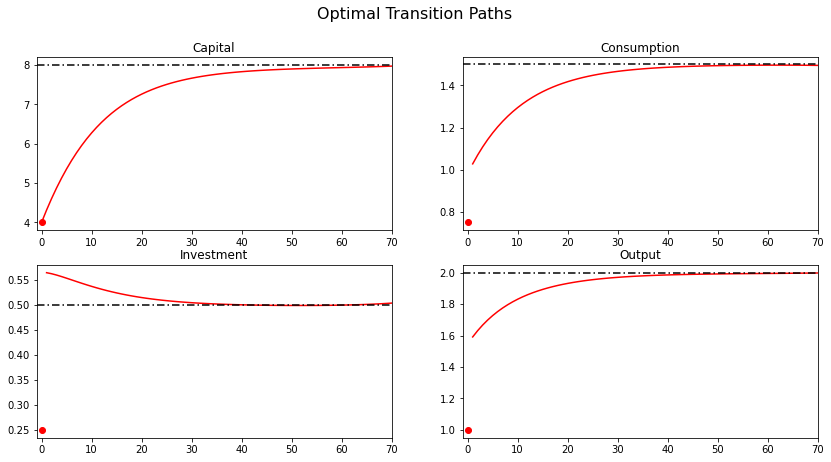

In [17]:
periods = np.arange(np.size(Capital))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2 , ncols=2 ,figsize=(14,7), facecolor="w")
fig.suptitle("Optimal Transition Paths", fontsize=16)


ax1.plot(periods, Capital, c="r")
ax1.scatter(periods[0], Capital[0], marker="o", c="r")
ax1.axhline(8, 0, 1, c="k", dashes=(5,2,1,2))
ax1.set_xlim((-1, 70))
ax1.set_title("Capital")

ax2.scatter(periods[0], Consumption[0], marker="o", c="r")
ax2.plot(periods[1:], Consumption[1:], c="r")
ax2.axhline(Euler.finalSS["c"], 0, 1, c="k", dashes=(5,2,1,2))
ax2.set_xlim((-1, 70))
ax2.set_title("Consumption")

ax3.scatter(periods[0], Investment[0], marker="o", c="r")
ax3.plot(periods[1:], Investment[1:], c="r")
ax3.axhline(Euler.finalSS["i"], 0, 1, c="k", dashes=(5,2,1,2))
ax3.set_xlim((-1, 70))
ax3.set_title("Investment")

ax4.scatter(periods[0], Output[0], marker="o", c="r")
ax4.plot(periods[1:], Output[1:], c="r")
ax4.axhline(Euler.finalSS["y"], 0, 1, c="k", dashes=(5,2,1,2))
ax4.set_xlim((-1, 70))
ax4.set_title("Output")

fig.savefig("Optimal Transition Paths")

In [18]:
ShockedEuler = SteadyState(initialSS, finalSS)
ShockedEuler.n = 10
KPreShock = ShockedEuler.OptimalPath()[:-1]
ShockedEuler.finalSS["z"] = 1.63
ShockedEuler.z = 1.63

def ShockPath(k, n=n):
    """
    Initialise an Euler equation model previously defined. Introduce one initial shock
    and then a second in t = 10
    """
    k[0] = KPreShock[-1]      # Initial Capital Level (First Steady State)
    k[-1] = 4
    path = np.zeros(n)
    ShockedEuler.finalSS["k"] = 4
    for i in range(n-2):
        if i == (n-2):
            path[i+1] = ShockedEuler.finalSS(k[i], k[i+1])
        else:
            path[i+1] = ShockedEuler.EulerEquations(k[i], k[i+1], k[i+2])
    return path

def ShockOptimalPath():
    n = 100
    x0 = np.linspace(4, 4.1, n)
    return fsolve(ShockPath, x0)

ShockSolution = ShockOptimalPath()

Kshock = np.hstack((KPreShock[1:], ShockSolution))

In [19]:
PreShockC = Euler.Consumption(KPreShock)
ShockedC = ShockedEuler.Consumption(Kshock[10:])
CShock = np.hstack((PreShockC, ShockedC))
CShock = np.delete(CShock, [9, 10])

In [20]:
PreShockI = Euler.Investment(KPreShock)
ShockedI = ShockedEuler.Investment(Kshock[10:])
IShock = np.hstack((PreShockI, ShockedI))
IShock = np.delete(IShock, [9,10])


In [21]:
ShockedY = np.add(CShock, IShock)


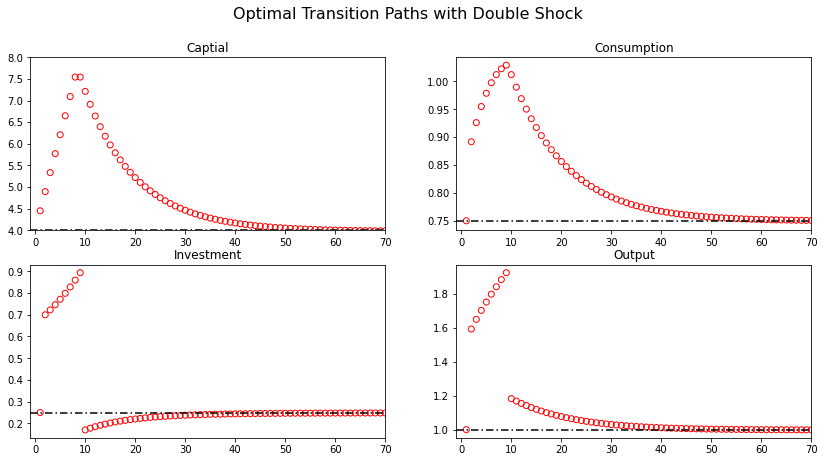

In [22]:
ShockPeriods = np.arange(start=1, stop = (np.size(Kshock)+1), step=1)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(14,7), facecolor="w")
fig.suptitle("Optimal Transition Paths with Double Shock", fontsize=16)

ax1.set_title("Captial")
ax1.scatter(ShockPeriods, Kshock, facecolors='none', edgecolors='r')
ax1.set_xlim((-1, 70))
ax1.set_ylim((4.0, 8))
ax1.axhline(Euler.initialSS["k"], 0, 1, c="k", dashes=(5,2,1,2))


ax2.set_title("Consumption")
ax2.scatter(ShockPeriods[:-3], CShock, facecolors='none', edgecolors='r')
ax2.set_xlim((-1, 70))
ax2.axhline(Euler.initialSS["c"], 0, 1, c="k", dashes=(5,2,1,2))



ax3.set_title("Investment")
ax3.scatter(ShockPeriods[:-3], IShock, facecolors='none', edgecolors='r')
ax3.set_xlim((-1, 70))
ax3.axhline(Euler.initialSS["i"], 0, 1, c="k", dashes=(5,2,1,2))


ax4.set_title("Output")
ax4.scatter(ShockPeriods[:-3], ShockedY, facecolors='none', edgecolors='r')
ax4.set_xlim((-1, 70))
ax4.axhline(Euler.initialSS["y"], 0, 1, c="k", dashes=(5,2,1,2))
fig.savefig("Optimal Transition Paths with Double Shock")

